In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('UNSW_NB15_bayesian_enc_training_set.csv')
test = pd.read_csv('UNSW_NB15_bayesian_enc_testing_set.csv')

In [2]:
x1 = train.iloc[:,1:43]
y1 = train['label']
print(x1)
print(y1)

             dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0       0.121478      6      4     258     172      74.087490   252   254   
1       0.649902     14     38     734   42014      78.473372    62   252   
2       1.623129      8     16     364   13186      14.170161    62   252   
3       1.681642     12     12     628     770      13.677108    62   252   
4       0.449454     10      6     534     268      33.373826   254   252   
...          ...    ...    ...     ...     ...            ...   ...   ...   
175336  0.000009      2      0     114       0  111111.107200   254     0   
175337  0.505762     10      8     620     354      33.612649   254   252   
175338  0.000009      2      0     114       0  111111.107200   254     0   
175339  0.000009      2      0     114       0  111111.107200   254     0   
175340  0.000009      2      0     114       0  111111.107200   254     0   

               sload          dload  ...  ct_dst_src_ltm  is_ftp_login  \
0

In [3]:
x2 = test.iloc[:,1:43]
y2 = test['label']
print(x2)
print(y2)

            dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0      0.000011      2      0     496       0   90909.090200   254     0   
1      0.000008      2      0    1762       0  125000.000300   254     0   
2      0.000005      2      0    1068       0  200000.005100   254     0   
3      0.000006      2      0     900       0  166666.660800   254     0   
4      0.000010      2      0    2126       0  100000.002500   254     0   
...         ...    ...    ...     ...     ...            ...   ...   ...   
82327  0.000005      2      0     104       0  200000.005100   254     0   
82328  1.106101     20      8   18062     354      24.410067   254   252   
82329  0.000000      1      0      46       0       0.000000     0     0   
82330  0.000000      1      0      46       0       0.000000     0     0   
82331  0.000009      2      0     104       0  111111.107200   254     0   

              sload        dload  ...  ct_dst_src_ltm  is_ftp_login  \
0      1.803636e

In [4]:
train["label"].value_counts()

1    119341
0     56000
Name: label, dtype: int64

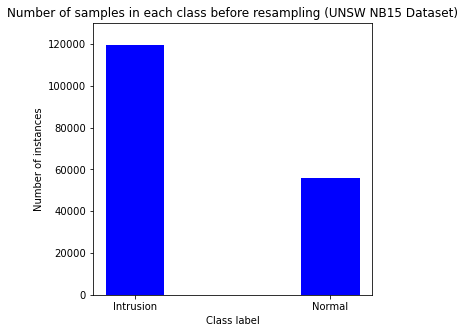

In [147]:
from matplotlib import pyplot as plt
data1 = {'Intrusion':119341, 'Normal':56000}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (UNSW NB15 Dataset)")
plt.show()

In [8]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

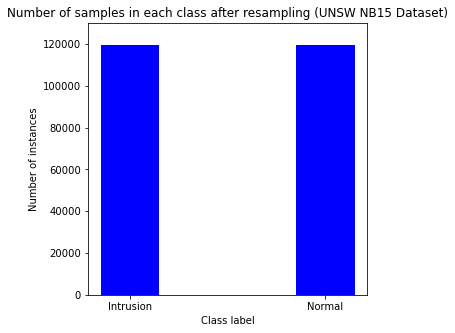

In [148]:
data2 = {'Intrusion':119341, 'Normal':119341}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (UNSW NB15 Dataset)")
plt.show()

In [11]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [12]:
# 1. XGBOOST FEATURE SELECTION

from xgboost import XGBClassifier
import xgboost as xgb
params = {
            'objective':'binary:logistic',
            'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
            'colsample_bytree': 0.6, 'scale_pos_weight': 1,
            'alpha': 0.05,
            'learning_rate': 0.01,
            'n_estimators':1484,'seed': 27
         }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x1, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.05, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=1484, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.0500000007,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
y_pred=xgb_clf.predict(x2)
print(y_pred)

[1 1 1 ... 0 0 1]


In [14]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Accuracy in XGBoost classifier before FS = ', metrics.accuracy_score(y2, y_pred)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, y_pred, average='macro'))

Accuracy in XGBoost classifier before FS =  90.19579264441529
Confusion Matrix = [[30333  6667]
 [ 1405 43927]]
Recall = 0.901957926444153
Precision = 0.9075505953722935
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.82      0.88     37000
           1       0.87      0.97      0.92     45332

    accuracy                           0.90     82332
   macro avg       0.91      0.89      0.90     82332
weighted avg       0.91      0.90      0.90     82332

F1 Score =  0.8992101981109784


In [15]:
abc = list(train.columns[1:43])
abc

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'proto',
 'service',
 'state']

In [16]:
xgb_clf.get_booster().feature_names = abc

ValueError: The number of FixedLocator locations (41), usually from a call to set_ticks, does not match the number of ticklabels (42).

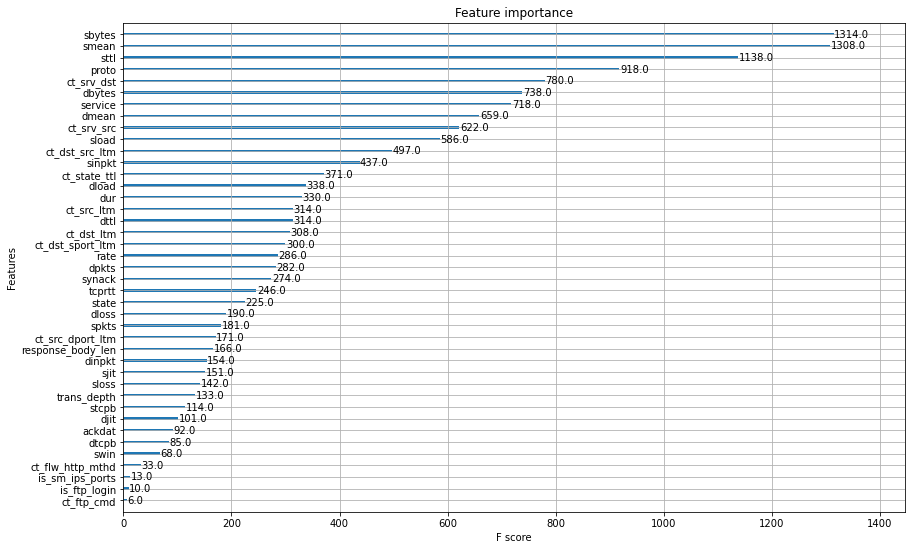

In [151]:
from IPython.core.pylabtools import figsize
figsize(14, 9)
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf).set_yticklabels(abc)

In [18]:
pd.Series(xgb_clf.get_booster().get_fscore()).sort_values(ascending=False)

sbytes               1314.0
smean                1308.0
sttl                 1138.0
proto                 918.0
ct_srv_dst            780.0
dbytes                738.0
service               718.0
dmean                 659.0
ct_srv_src            622.0
sload                 586.0
ct_dst_src_ltm        497.0
sinpkt                437.0
ct_state_ttl          371.0
dload                 338.0
dur                   330.0
dttl                  314.0
ct_src_ltm            314.0
ct_dst_ltm            308.0
ct_dst_sport_ltm      300.0
rate                  286.0
dpkts                 282.0
synack                274.0
tcprtt                246.0
state                 225.0
dloss                 190.0
spkts                 181.0
ct_src_dport_ltm      171.0
response_body_len     166.0
dinpkt                154.0
sjit                  151.0
sloss                 142.0
trans_depth           133.0
stcpb                 114.0
djit                  101.0
ackdat                 92.0
dtcpb               

In [19]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb_clf.feature_importances_)
print(thresholds)

[0.         0.00099017 0.0013981  0.00147036 0.00186453 0.00210151
 0.00216204 0.00259694 0.00276687 0.00280384 0.00302189 0.00305254
 0.00376175 0.00380013 0.00423597 0.00575661 0.0087861  0.00924131
 0.00928142 0.00929924 0.01018487 0.01040456 0.0105014  0.01087367
 0.01271875 0.0127267  0.01446236 0.01625599 0.01757275 0.01902718
 0.01905347 0.02349709 0.02495558 0.03029837 0.03153918 0.03266563
 0.03463912 0.03624013 0.04380761 0.08281151 0.18206108 0.24531169]


In [21]:
n_min = 42
acc_max = 0
thresholds = sort(xgb_clf.feature_importances_)
obj_thresh = thresholds[0]
for thresh in thresholds:
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x1)
    selection_model = XGBClassifier(**params)
    selection_model.fit(select_X_train, y1)
    select_X_test = selection.transform(x2)
    predictions = selection_model.predict(select_X_test)
    accuracy = metrics.accuracy_score(y2, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (obj_thresh, select_X_train.shape[1], accuracy*100.0))
    if(select_X_train.shape[1] < n_min) and (accuracy > acc_max):
        n_min = select_X_train.shape[1]
        acc_max = accuracy
        obj_thresh = thresh

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=42, Accuracy: 90.20%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=41, Accuracy: 90.23%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.001, n=40, Accuracy: 90.22%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.001, n=39, Accuracy: 90.27%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.001, n=38, Accuracy: 90.20%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.001, n=37, Accuracy: 90.28%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=36, Accuracy: 90.17%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=35, Accuracy: 90.39%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=34, Accuracy: 90.40%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=33, Accuracy: 90.39%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=32, Accuracy: 90.34%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=31, Accuracy: 90.48%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=30, Accuracy: 90.52%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=29, Accuracy: 90.42%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=28, Accuracy: 90.41%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=27, Accuracy: 90.48%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=26, Accuracy: 90.48%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=25, Accuracy: 90.47%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=24, Accuracy: 90.34%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=23, Accuracy: 90.37%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=22, Accuracy: 90.28%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=21, Accuracy: 90.19%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=20, Accuracy: 90.18%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=19, Accuracy: 89.94%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=18, Accuracy: 90.05%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:28:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=17, Accuracy: 90.11%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=16, Accuracy: 90.33%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.004, n=15, Accuracy: 90.53%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=14, Accuracy: 90.44%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=13, Accuracy: 90.41%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=12, Accuracy: 89.97%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=11, Accuracy: 86.91%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=10, Accuracy: 86.69%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:56:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=9, Accuracy: 86.82%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=8, Accuracy: 85.32%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=7, Accuracy: 81.03%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=6, Accuracy: 81.03%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=5, Accuracy: 80.92%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=4, Accuracy: 80.72%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=3, Accuracy: 80.45%
[04:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.016, n=2, Accuracy: 80.57%
[04:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.016, n=1, Accuracy: 79.34%


In [22]:
selection = SelectFromModel(xgb_clf, threshold=obj_thresh, prefit=True)
select_X_train = selection.transform(x1)
selection_model = XGBClassifier(**params)
selection_model.fit(select_X_train, y1)
select_X_test = selection.transform(x2)
predictions = selection_model.predict(select_X_test)
accuracy = metrics.accuracy_score(y2, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (obj_thresh, select_X_train.shape[1], accuracy*100.0))

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.016, n=15, Accuracy: 90.53%


In [23]:
select_X_train

array([[1.77397889e-05, 9.88235294e-01, 1.00000000e+00, ...,
        4.55718013e-01, 5.43381901e-01, 5.22134621e-01],
       [5.44534390e-05, 2.43137255e-01, 9.92125984e-01, ...,
        4.55718013e-01, 5.43381901e-01, 5.22134621e-01],
       [2.59155177e-05, 2.43137255e-01, 9.92125984e-01, ...,
        4.55718013e-01, 5.43381901e-01, 5.22134621e-01],
       ...,
       [4.16499392e-05, 1.21568627e-01, 1.14173228e-01, ...,
        7.62472897e-01, 5.43381901e-01, 7.63081904e-02],
       [4.04929964e-05, 9.96078431e-01, 9.92125984e-01, ...,
        4.55718013e-01, 5.43381901e-01, 5.22134621e-01],
       [5.86184330e-06, 9.96078431e-01, 0.00000000e+00, ...,
        7.62472897e-01, 5.43381901e-01, 1.00000000e+00]])

In [24]:
select_X_test

array([[3.60966140e-05, 9.96078431e-01, 0.00000000e+00, ...,
        7.62472897e-01, 5.43381901e-01, 1.00000000e+00],
       [1.33742583e-04, 9.96078431e-01, 0.00000000e+00, ...,
        7.62472897e-01, 5.43381901e-01, 1.00000000e+00],
       [8.02146977e-05, 9.96078431e-01, 0.00000000e+00, ...,
        7.62472897e-01, 5.43381901e-01, 1.00000000e+00],
       ...,
       [1.38833131e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.43381901e-01, 1.00000000e+00],
       [1.38833131e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.43381901e-01, 1.00000000e+00],
       [5.86184330e-06, 9.96078431e-01, 0.00000000e+00, ...,
        7.62472897e-01, 5.43381901e-01, 1.00000000e+00]])

In [25]:
select_X_train.shape

(238682, 15)

In [26]:
select_X_test.shape

(82332, 15)

In [61]:
recon_feat_train = pd.DataFrame(select_X_train, columns =['XGB_0', 'XGB_1','XGB_2','XGB_3','XGB_4','XGB_5','XGB_6','XGB_7',
                                                          'XGB_8','XGB_9','XGB_10','XGB_11','XGB_12','XGB_13','XGB_14'])
recon_feat_train

,XGB_0,XGB_1,XGB_2,XGB_3,XGB_4,XGB_5,XGB_6,XGB_7,XGB_8,XGB_9,XGB_10,XGB_11,XGB_12,XGB_13,XGB_14
0,0.000018,0.988235,1.000000,2.364553e-06,0.000379,1.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.455718,0.543382,0.522135
1,0.000054,0.243137,0.992126,1.401989e-06,0.022458,1.0,0.000000,0.166667,0.0,0.015625,0.00,0.081967,0.455718,0.543382,0.522135
2,0.000026,0.243137,0.992126,2.625704e-07,0.002717,1.0,0.033164,0.166667,0.0,0.031250,0.00,0.081967,0.455718,0.543382,0.522135
3,0.000046,0.243137,0.992126,4.576117e-07,0.000150,1.0,0.000000,0.166667,0.0,0.031250,0.25,0.000000,0.455718,0.599221,0.522135
4,0.000039,0.996078,0.992126,1.429776e-06,0.000178,1.0,0.037632,0.166667,0.0,0.609375,0.00,0.622951,0.455718,0.543382,0.522135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238677,0.002619,0.121569,0.114173,1.241383e-03,0.045658,1.0,0.000096,0.000000,0.0,0.000000,0.00,0.000000,0.455718,0.660945,0.522135
238678,0.000302,0.121569,0.114173,8.542544e-06,0.002429,1.0,0.000077,0.000000,0.0,0.000000,0.00,0.032787,0.455718,0.141451,0.522135
238679,0.000042,0.121569,0.114173,1.283621e-04,0.018829,0.0,0.000000,0.000000,0.0,0.031250,0.00,0.065574,0.762473,0.543382,0.076308
238680,0.000040,0.996078,0.992126,8.241986e-07,0.000099,1.0,0.042977,0.166667,0.0,0.046875,0.00,0.049180,0.455718,0.543382,0.522135


In [62]:
recon_feat_test = pd.DataFrame(select_X_test, columns =['XGB_0', 'XGB_1','XGB_2','XGB_3','XGB_4','XGB_5','XGB_6','XGB_7',
                                                          'XGB_8','XGB_9','XGB_10','XGB_11','XGB_12','XGB_13','XGB_14'])
recon_feat_test

,XGB_0,XGB_1,XGB_2,XGB_3,XGB_4,XGB_5,XGB_6,XGB_7,XGB_8,XGB_9,XGB_10,XGB_11,XGB_12,XGB_13,XGB_14
0,0.000036,0.996078,0.000000,0.030121,0.0000,0.0,0.00000,0.333333,0.0,0.015625,0.0,0.016393,0.762473,0.543382,1.000000
1,0.000134,0.996078,0.000000,0.147128,0.0000,0.0,0.00000,0.333333,0.0,0.015625,0.0,0.016393,0.762473,0.543382,1.000000
2,0.000080,0.996078,0.000000,0.142685,0.0000,0.0,0.00000,0.333333,0.0,0.031250,0.0,0.032787,0.762473,0.543382,1.000000
3,0.000067,0.996078,0.000000,0.100200,0.0000,0.0,0.00000,0.333333,0.0,0.031250,0.0,0.032787,0.762473,0.543382,1.000000
4,0.000162,0.996078,0.000000,0.142017,0.0000,0.0,0.00000,0.333333,0.0,0.031250,0.0,0.032787,0.762473,0.543382,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000006,0.996078,0.000000,0.013894,0.0000,0.0,0.00000,0.333333,0.0,0.015625,0.0,0.000000,0.762473,0.543382,1.000000
82328,0.001391,0.996078,0.992126,0.000021,0.0001,1.0,0.04801,0.166667,0.0,0.000000,0.0,0.016393,0.455718,0.543382,0.522135
82329,0.000001,0.000000,0.000000,0.000000,0.0000,0.0,0.00000,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.543382,1.000000
82330,0.000001,0.000000,0.000000,0.000000,0.0000,0.0,0.00000,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.543382,1.000000


In [64]:
x1_recon = recon_feat_train.iloc[:,:]
print(x1_recon)
x2_recon = recon_feat_test.iloc[:,:]
print(x2_recon)

           XGB_0     XGB_1     XGB_2         XGB_3     XGB_4  XGB_5     XGB_6  \
0       0.000018  0.988235  1.000000  2.364553e-06  0.000379    1.0  0.000000   
1       0.000054  0.243137  0.992126  1.401989e-06  0.022458    1.0  0.000000   
2       0.000026  0.243137  0.992126  2.625704e-07  0.002717    1.0  0.033164   
3       0.000046  0.243137  0.992126  4.576117e-07  0.000150    1.0  0.000000   
4       0.000039  0.996078  0.992126  1.429776e-06  0.000178    1.0  0.037632   
...          ...       ...       ...           ...       ...    ...       ...   
238677  0.002619  0.121569  0.114173  1.241383e-03  0.045658    1.0  0.000096   
238678  0.000302  0.121569  0.114173  8.542544e-06  0.002429    1.0  0.000077   
238679  0.000042  0.121569  0.114173  1.283621e-04  0.018829    0.0  0.000000   
238680  0.000040  0.996078  0.992126  8.241986e-07  0.000099    1.0  0.042977   
238681  0.000006  0.996078  0.000000  7.719141e-03  0.000000    0.0  0.000000   

           XGB_7  XGB_8    

In [65]:
# 2. XGBoost CLASSIFIER MODEL

# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, predictions)
print('ROC AUC: %f' % auc)

ROC AUC: 0.897457


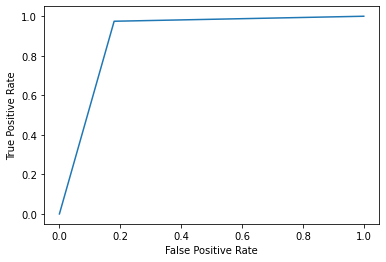

In [66]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, predictions)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, predictions, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, predictions, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, predictions, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, predictions, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, predictions, average='macro'))

Accuracy in XGBoost classifier model =  90.52737696157023
Confusion Matrix = [[30348  6652]
 [ 1147 44185]]
Recall = 0.9052737696157023
Precision = 0.9115877568826486
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.82      0.89     37000
           1       0.87      0.97      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.92      0.90      0.90     82332
weighted avg       0.91      0.91      0.90     82332

F1 Score =  0.9025204275707456


<AxesSubplot:>

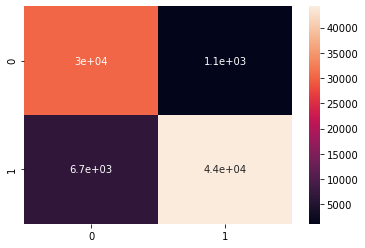

In [68]:
cm_xgb = metrics.confusion_matrix(predictions, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

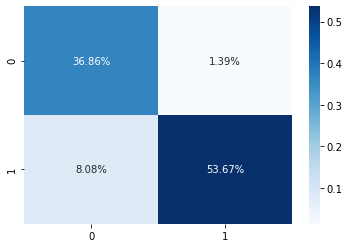

In [69]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [70]:
# 3. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=15, activation = "relu",input_shape = select_X_train.shape[1:]))
model_DNN.add(keras.layers.Dense(units=30,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=60,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=120,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=240,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 30)                480       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 60)                1860      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 120)               7320      
                                                                 
 dropout_2 (Dropout)         (None, 120)               0

In [71]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNet_new.h5",monitor='val_loss')
history = model_DNN.fit(select_X_train, y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [select_X_test, y2])
testloss,testaccuracy=model_DNN.evaluate(select_X_test,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 54s 4ms/step - loss: 0.2846 - accuracy: 0.8726 - val_loss: 0.4632 - val_accuracy: 0.7875
Epoch 2/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.3209 - accuracy: 0.8784 - val_loss: 0.4925 - val_accuracy: 0.7671
Epoch 3/50
14918/14918 [==============================] - 52s 3ms/step - loss: 0.3371 - accuracy: 0.8773 - val_loss: 0.5516 - val_accuracy: 0.7865
Epoch 4/50
14918/14918 [==============================] - 45s 3ms/step - loss: 0.3405 - accuracy: 0.8823 - val_loss: 0.4709 - val_accuracy: 0.7865
Epoch 5/50
14918/14918 [==============================] - 44s 3ms/step - loss: 0.3320 - accuracy: 0.8789 - val_loss: 0.4726 - val_accuracy: 0.7873
Epoch 6/50
14918/14918 [==============================] - 44s 3ms/step - loss: 0.3729 - accuracy: 0.8672 - val_loss: 0.4698 - val_accuracy: 0.7875
Epoch 7/50
14918/14918 [==============================] - 44s 3ms/step - loss: 0.3677 - accuracy: 0.8809 - val_loss: 0

In [74]:
y_pred_DNN = model_DNN.predict(select_X_test)
print(y_pred_DNN)
y_pred_class_DNN=np.argmax(y_pred_DNN,axis=1)
print(y_pred_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[[3.4596896e-01 6.7292333e-01]
 [3.4596896e-01 6.7292333e-01]
 [3.4596896e-01 6.7292333e-01]
 ...
 [1.0000000e+00 4.0190206e-35]
 [1.0000000e+00 4.0190206e-35]
 [3.4596896e-01 6.7292333e-01]]
[1 1 1 ... 0 0 1]
Test Loss = 0.46321776509284973
Test Accuracy = 0.7875066995620728


In [75]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.763581


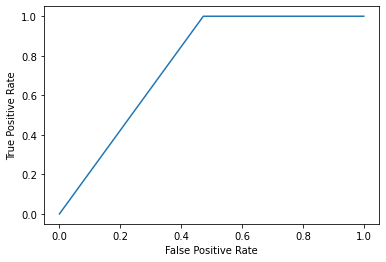

In [76]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_DNN, y2, average='macro'))

Accuracy in DNN classifier model =  78.75066802701258
Confusion Matrix = [[19505     0]
 [17495 45332]]
Recall = 0.7875066802701258
Precision = 0.8879815621261838
Classification Report =
               precision    recall  f1-score   support

           0       0.53      1.00      0.69     19505
           1       1.00      0.72      0.84     62827

    accuracy                           0.79     82332
   macro avg       0.76      0.86      0.76     82332
weighted avg       0.89      0.79      0.80     82332

F1 Score =  0.764314388608677


<AxesSubplot:>

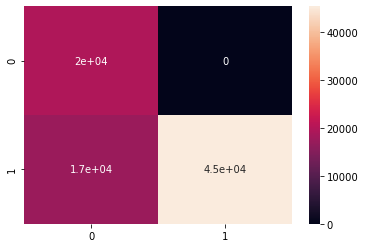

In [78]:
cm_DNN = metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

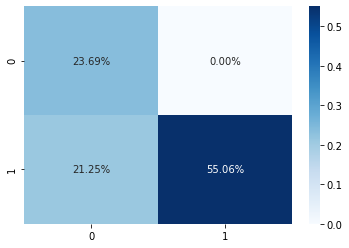

In [79]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [80]:
# 4. CNN CLASSIFIER MODEL

select_X_train_CNN = np.reshape(select_X_train, (select_X_train.shape[0],select_X_train.shape[1],1))
select_X_test_CNN = np.reshape(select_X_test, (select_X_test.shape[0],select_X_test.shape[1],1))

In [81]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(15,3,activation="relu",input_shape=(15,1)))
convnet.add(keras.layers.Convolution1D(30,3,activation="relu"))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(60,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 15)            60        
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 30)            1380      
                                                                 
 batch_normalization (BatchN  (None, 11, 30)           120       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 30)            0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 5, 30)             0         
                                                                 
 flatten (Flatten)           (None, 150)              

In [82]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNet_new.h5",monitor='val_loss')
history = convnet.fit(select_X_train_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [select_X_test_CNN, y2])
testloss,testaccuracy=convnet.evaluate(select_X_test_CNN,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.1732 - accuracy: 0.9121 - val_loss: 0.2810 - val_accuracy: 0.8129
Epoch 2/50
14918/14918 [==============================] - 54s 4ms/step - loss: 0.1584 - accuracy: 0.9167 - val_loss: 0.2337 - val_accuracy: 0.9134
Epoch 3/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.1530 - accuracy: 0.9192 - val_loss: 0.2762 - val_accuracy: 0.8938
Epoch 4/50
14918/14918 [==============================] - 56s 4ms/step - loss: 0.1531 - accuracy: 0.9184 - val_loss: 0.2442 - val_accuracy: 0.9281
Epoch 5/50
14918/14918 [==============================] - 55s 4ms/step - loss: 0.1508 - accuracy: 0.9189 - val_loss: 0.2643 - val_accuracy: 0.9162
Epoch 6/50
14918/14918 [==============================] - 57s 4ms/step - loss: 0.1516 - accuracy: 0.9186 - val_loss: 0.2492 - val_accuracy: 0.8847
Epoch 7/50
14918/14918 [==============================] - 55s 4ms/step - loss: 0.1498 - accuracy: 0.9191 - val_loss: 0

In [85]:
y_pred_CNN = convnet.predict(select_X_test_CNN)
print(y_pred_CNN)
y_pred_class_CNN=np.argmax(y_pred_CNN,axis=1)
print(y_pred_class_CNN)

[[0.30220604 0.69779396]
 [0.3898829  0.6101171 ]
 [0.4798804  0.52011955]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.0035486  0.9964514 ]]
[1 1 1 ... 0 0 1]


In [86]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.788004


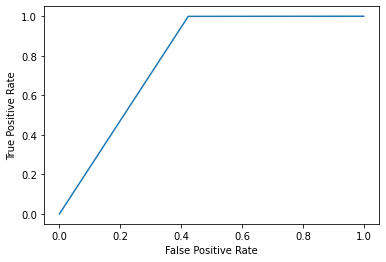

In [87]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_CNN, y2, average='macro'))

Accuracy in CNN classifier model =  80.93936743914881
Confusion Matrix = [[21336    29]
 [15664 45303]]
Recall = 0.8093936743914881
Precision = 0.8896673988574126
Classification Report =
               precision    recall  f1-score   support

           0       0.58      1.00      0.73     21365
           1       1.00      0.74      0.85     60967

    accuracy                           0.81     82332
   macro avg       0.79      0.87      0.79     82332
weighted avg       0.89      0.81      0.82     82332

F1 Score =  0.7917461824472181


<AxesSubplot:>

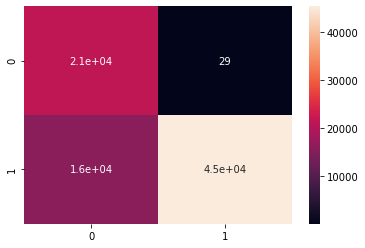

In [89]:
cm_CNN = metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

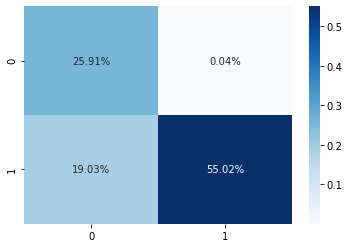

In [90]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [27]:
# 5. TCN CLASSIFIER MODEL

print(select_X_train.shape[0])
print(select_X_test.shape[0])

238682
82332


In [28]:
print(select_X_train.shape, y1.shape, select_X_test.shape, y2.shape)
select_X_train_TCN = np.reshape(select_X_train, (select_X_train.shape[0],select_X_train.shape[1],1))
select_X_test_TCN = np.reshape(select_X_test, (select_X_test.shape[0],select_X_test.shape[1],1))
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(238682, 15) (238682,) (82332, 15) (82332,)
(238682, 15, 1) (238682,) (82332, 15, 1) (82332,)


In [29]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(238682, 15, 1) (238682,) (82332, 15, 1) (82332,)


In [30]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(238682, 15, 1) (238682,) (82332, 15, 1) (82332,)


In [31]:
!pip install keras-tcn

In [32]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [33]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,
                     max_len=select_X_train_TCN[0:1].shape[1],use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 15, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
print(select_X_train_TCN[0:1].shape[1])

15


In [35]:
print(f'x_train.shape = {select_X_train_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {select_X_test_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (238682, 15, 1)
y_train.shape = (238682, 2, 1)
x_test.shape = (82332, 15, 1)
y_test.shape = (82332, 2, 1)


In [36]:
model_TCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [37]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [38]:
history = model_TCN.fit(select_X_train_TCN, y1_TCN, epochs = 10, validation_data = [select_X_test_TCN, y2_TCN], 
                    workers=4, use_multiprocessing=True)

Epoch 1/10
7459/7459 [==============================] - 809s 107ms/step - loss: 0.1522 - accuracy: 0.9256 - val_loss: 0.2673 - val_accuracy: 0.8701
Epoch 2/10
7459/7459 [==============================] - 796s 107ms/step - loss: 0.1331 - accuracy: 0.9316 - val_loss: 0.2228 - val_accuracy: 0.8854
Epoch 3/10
7459/7459 [==============================] - 795s 107ms/step - loss: 0.1293 - accuracy: 0.9331 - val_loss: 0.2296 - val_accuracy: 0.8872
Epoch 4/10
7459/7459 [==============================] - 795s 107ms/step - loss: 0.1274 - accuracy: 0.9337 - val_loss: 0.2368 - val_accuracy: 0.8851
Epoch 5/10
7459/7459 [==============================] - 797s 107ms/step - loss: 0.1260 - accuracy: 0.9343 - val_loss: 0.2161 - val_accuracy: 0.8957
Epoch 6/10
7459/7459 [==============================] - 795s 107ms/step - loss: 0.1251 - accuracy: 0.9350 - val_loss: 0.2255 - val_accuracy: 0.8943
Epoch 7/10
7459/7459 [==============================] - 794s 107ms/step - loss: 0.1249 - accuracy: 0.9347 - val_

In [39]:
result = model_TCN.evaluate(select_X_test_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

2573/2573 [==============================] - 75s 29ms/step - loss: 0.2239 - accuracy: 0.8975
Accuracy : 89.75 %
Loss : 22.39 %


In [42]:
y_pred_TCN = model_TCN.predict(select_X_test_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 1 ... 0 0 1]
[1 1 1 ... 0 0 1]


In [43]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.888620


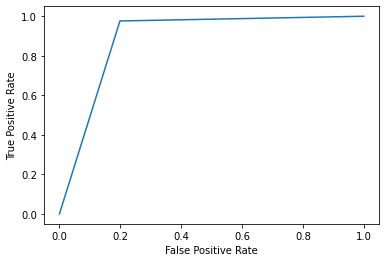

In [44]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy in TCN classifier model =  89.74760724870038
Confusion Matrix = [[29641  1082]
 [ 7359 44250]]
Recall = 0.8974760724870038
Precision = 0.91081988507869
Classification Report =
               precision    recall  f1-score   support

           0       0.80      0.96      0.88     30723
           1       0.98      0.86      0.91     51609

    accuracy                           0.90     82332
   macro avg       0.89      0.91      0.89     82332
weighted avg       0.91      0.90      0.90     82332

F1 Score =  0.8941431705987604


<AxesSubplot:>

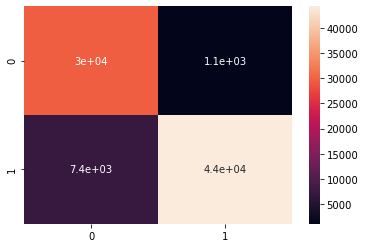

In [46]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

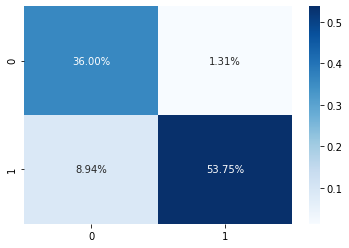

In [47]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [48]:
# 6. TabNet CLASSIFIER MODEL

print("X train shape: ", select_X_train.shape)
print("X test shape: ", select_X_test.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (238682, 15)
X test shape:  (82332, 15)
Y train shape:  (238682,)
Y test shape:  (82332,)


In [49]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [50]:
# define the model
model_TabNet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [51]:
# fit the model 
model_TabNet.fit(select_X_train,y1, eval_set=[(select_X_train, y1), (select_X_test, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, 
                   num_workers=0, weights=1,drop_last=False)    

epoch 0  | loss: 0.16112 | train_auc: 0.98547 | train_accuracy: 0.9176  | valid_auc: 0.96793 | valid_accuracy: 0.89575 |  0:00:54s
epoch 1  | loss: 0.14283 | train_auc: 0.98674 | train_accuracy: 0.92131 | valid_auc: 0.97134 | valid_accuracy: 0.83033 |  0:01:47s
epoch 2  | loss: 0.14063 | train_auc: 0.98774 | train_accuracy: 0.93069 | valid_auc: 0.97424 | valid_accuracy: 0.8691  |  0:02:41s
epoch 3  | loss: 0.13433 | train_auc: 0.98857 | train_accuracy: 0.93215 | valid_auc: 0.97644 | valid_accuracy: 0.89757 |  0:03:35s
epoch 4  | loss: 0.13347 | train_auc: 0.98838 | train_accuracy: 0.93176 | valid_auc: 0.97844 | valid_accuracy: 0.90657 |  0:04:29s
epoch 5  | loss: 0.13568 | train_auc: 0.98778 | train_accuracy: 0.92651 | valid_auc: 0.97489 | valid_accuracy: 0.91457 |  0:05:23s
epoch 6  | loss: 0.13143 | train_auc: 0.98842 | train_accuracy: 0.93312 | valid_auc: 0.98003 | valid_accuracy: 0.898   |  0:06:17s
epoch 7  | loss: 0.13237 | train_auc: 0.98865 | train_accuracy: 0.92434 | valid_auc

Text(0, 0.5, 'Feature index')

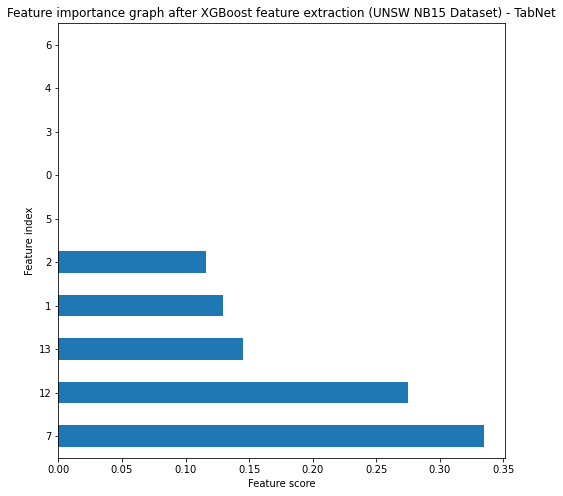

In [153]:
# find and plot feature importance 
from IPython.core.pylabtools import figsize
figsize(8, 8)
model_TabNet.feature_importances_
feat_importances = pd.Series(model_TabNet.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance graph after XGBoost feature extraction (UNSW NB15 Dataset) - TabNet")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [55]:
y_pred_TabNet = model_TabNet.predict(select_X_test)
print(y_pred_TabNet)

[1 0 0 ... 0 0 1]


In [56]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.927993


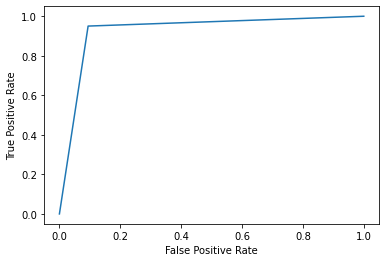

In [57]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 93.02458339406307
Confusion Matrix = [[33512  2255]
 [ 3488 43077]]
Recall = 0.9302458339406307
Precision = 0.9309126555344724
Classification Report =
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     35767
           1       0.95      0.93      0.94     46565

    accuracy                           0.93     82332
   macro avg       0.93      0.93      0.93     82332
weighted avg       0.93      0.93      0.93     82332

F1 Score =  0.929291491373768


<AxesSubplot:>

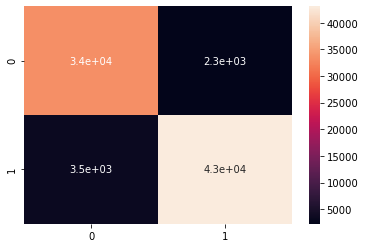

In [59]:
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

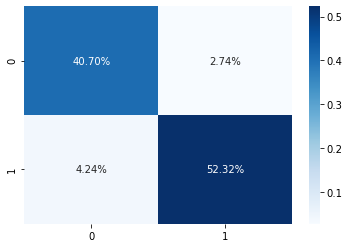

In [60]:
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [91]:
print("Thresh=%.3f, Number of selected features=%d" % (obj_thresh, select_X_train.shape[1]))
print('Accuracy result of all models:')
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, predictions)*100)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Thresh=0.016, Number of selected features=15
Accuracy result of all models:
Accuracy in XGBoost classifier model =  90.52737696157023
Accuracy in DNN classifier model =  78.75066802701258
Accuracy in CNN classifier model =  80.93936743914881
Accuracy in TCN classifier model =  89.74760724870038
Accuracy in TabNet classifier model: 93.02458339406307


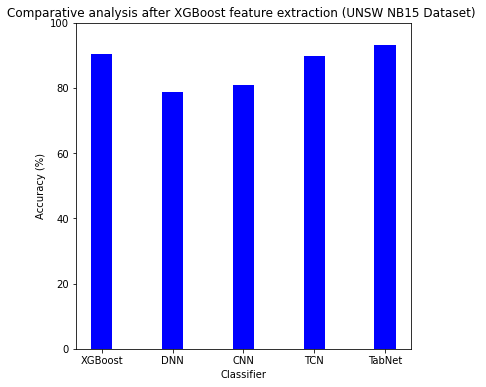

In [172]:
data = {'XGBoost':90.5, 'DNN':78.7, 'CNN':80.9,
        'TCN':89.7, 'TabNet':93.02}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")
plt.title("Comparative analysis after XGBoost feature extraction (UNSW NB15 Dataset) ")
plt.show()

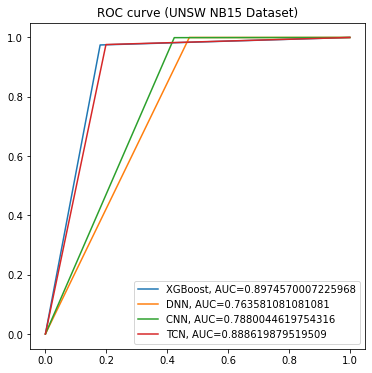

In [157]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
auc = roc_auc_score(y2, predictions)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve (UNSW NB15 Dataset)")
plt.legend()

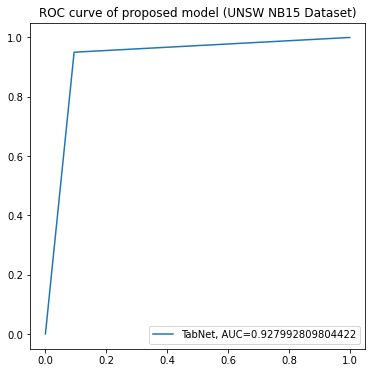

In [159]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model (UNSW NB15 Dataset)")
plt.legend()

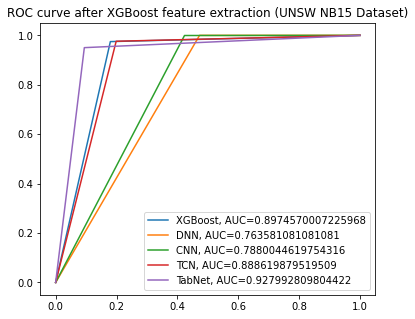

In [175]:
from IPython.core.pylabtools import figsize
figsize(6, 5)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
auc = roc_auc_score(y2, predictions)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve after XGBoost feature extraction (UNSW NB15 Dataset)")
plt.legend()

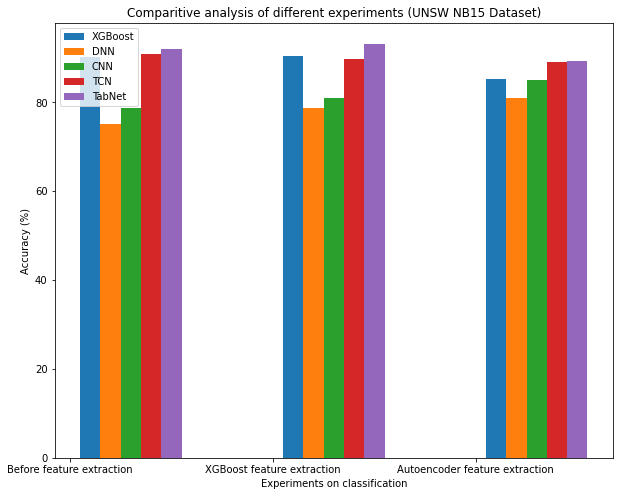

In [173]:
from IPython.core.pylabtools import figsize
fig = plt.figure(figsize = (10, 8))
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [90.1,90.5,85.32]
yvals = [75.1,78.7,81.03]
zvals = [78.7,80.9,85.10]
avals = [90.9,89.7,89.06]
bvals = [92.1,93.2,89.25]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (UNSW NB15 Dataset)")
plt.legend()
plt.show()